## Descriptive Statistics for Relational Novelty

Group comparisons for relational novelty, take top 10%, the lower 10%, and the middle and do the average relational novelty ( inverse of highest similarity ). And calculate the following measures for the 3 groups, the average relational novelty, the standard deviation of the relational novelty, the average pairwise similarity ( pairwise measure AMONG each group members ), and the standard deviation of the pairwise similarity.

In [1]:
%store -r stage1_bogota0
%store -r stage1_bogota1
%store -r stage1_bogota2
%store -r stage1_bogota3

%store -r stage2_bogota0
%store -r stage2_bogota1
%store -r stage2_bogota2
%store -r stage2_bogota3

%store -r stage3_bogota0
%store -r stage3_bogota1
%store -r stage3_bogota2
%store -r stage3_bogota3

%store -r stage4_bogota0
%store -r stage4_bogota1
%store -r stage4_bogota2
%store -r stage4_bogota3

In [2]:
stage1_bogota0

,user1,user2,user1_phase,user2_phase,similarity
37,fffeelipe,mnguzmanc,1,2,0.000000
38,fffeelipe,jmcuestasb,1,2,0.000000
39,fffeelipe,katherinsb,1,2,0.000000
40,fffeelipe,jjrodriguezn,1,2,0.000000
41,fffeelipe,DglyP,1,2,0.000000
...,...,...,...,...,...
2029,odprietoh,jdsolanos,1,2,0.017857
2030,odprietoh,jcneivaa,1,2,0.000000
2031,odprietoh,fmbernalb,1,2,0.067568
2032,odprietoh,MogGy94,1,2,0.000000


In [3]:
import pandas as pd 
import seaborn as sns
import math
df = pd.read_csv("merged-sim-best.csv")
df

,Unnamed: 0,Unnamed: 0.1,Student,phase,novelty,group,abs_perform_diff_best,user2,Q7_Q7_1,Q7_Q7_2,...,count,total,user-requirement,infovis,novelty_score,exploration,Group,len_unique,added_sum,sim-to-best
0,0,1,wilson911013,1,0.000000,3,250.84,wilson911013,0.0,1.0,...,1.0,90.83,20.0,33.33,0.0,0.000000,3.0,0.0,0.0,0.000000
1,2,5,lizzyt10h,1,0.400000,3,175.00,lizzyt10h,2.0,1.0,...,7.0,75.00,0.0,0.00,0.0,0.945312,3.0,13.0,6.0,0.125000
2,3,6,AFelipeGA,1,0.400000,3,291.67,AFelipeGA,4.0,3.0,...,3.0,152.50,40.0,37.50,0.0,0.995375,3.0,2059.0,2049.0,0.003841
3,4,7,wapiravaguens,1,0.400000,3,90.00,wapiravaguens,0.0,1.0,...,1.0,192.50,80.0,50.00,0.0,0.567164,3.0,63.0,34.0,0.202532
4,5,8,capinzor,1,0.413793,3,221.67,capinzor,0.0,0.0,...,0.0,120.00,20.0,25.00,0.0,0.000000,3.0,20.0,0.0,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,647,651,kastellanos,3,0.000000,1,345.83,kastellanos,5.0,5.0,...,0.0,0.00,0.0,0.00,0.0,0.000000,1.0,NaN,NaN,NaN
632,648,652,tres-iqus,3,0.000000,2,358.33,tres-iqus,1.0,1.0,...,0.0,0.00,0.0,0.00,0.0,0.000000,2.0,NaN,NaN,NaN
633,649,653,annumumozme,4,0.000000,0,313.33,NaN,NaN,NaN,...,0.0,237.50,40.0,37.50,60.0,0.000000,0.0,NaN,NaN,NaN
634,650,654,kastellanos,4,0.000000,1,350.00,kastellanos,5.0,5.0,...,0.0,0.00,0.0,0.00,0.0,0.000000,1.0,NaN,NaN,NaN


In [4]:
df_g3 = df[df['group'] == 3]
df_g3_p1 = df_g3[df_g3['phase'] == 1]
df_g3_p2 = df_g3[df_g3['phase'] == 2]
df_g3_p3 = df_g3[df_g3['phase'] == 3]
df_g3_p4 = df_g3[df_g3['phase'] == 4]

df_g2 = df[df['group'] == 2]
df_g2_p1 = df_g2[df_g2['phase'] == 1]
df_g2_p2 = df_g2[df_g2['phase'] == 2]
df_g2_p3 = df_g2[df_g2['phase'] == 3]
df_g2_p4 = df_g2[df_g2['phase'] == 4]

df_g1 = df[df['group'] == 1]
df_g1_p1 = df_g1[df_g1['phase'] == 1]
df_g1_p2 = df_g1[df_g1['phase'] == 2]
df_g1_p3 = df_g1[df_g1['phase'] == 3]
df_g1_p4 = df_g1[df_g1['phase'] == 4]

df_g0 = df[df['group'] == 0]
df_g0_p1 = df_g0[df_g0['phase'] == 1]
df_g0_p2 = df_g0[df_g0['phase'] == 2]
df_g0_p3 = df_g0[df_g0['phase'] == 3]
df_g0_p4 = df_g0[df_g0['phase'] == 4]

In [5]:
math.ceil(len(df_g3_p1['novelty']) * 0.1)

4

In [6]:
math.ceil(len(df_g2_p1['novelty']) * 0.1)

5

In [7]:
math.ceil(len(df_g1_p1['novelty']) * 0.1)

5

In [8]:
math.ceil(len(df_g0_p1['novelty']) * 0.1)

4

In [9]:
math.ceil(len(df_g3_p1['novelty']) * 0.55)

21

In [10]:
math.ceil(len(df_g3_p1['novelty']) * 0.65)

25

In [11]:
math.ceil(len(df_g2_p1['novelty']) * 0.55)

24

In [12]:
math.ceil(len(df_g2_p1['novelty']) * 0.65)

28

In [13]:
math.ceil(len(df_g1_p1['novelty']) * 0.55)

23

In [14]:
math.ceil(len(df_g1_p1['novelty']) * 0.65)

27

In [15]:
math.ceil(len(df_g0_p1['novelty']) * 0.55)

22

In [16]:
math.ceil(len(df_g0_p1['novelty']) * 0.65)

26

In [17]:
df_g3_p1 = df_g3_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g3_p2 = df_g3_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g3_p3 = df_g3_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g3_p4 = df_g3_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g3_p1 = df_g3_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g3_p2 = df_g3_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g3_p3 = df_g3_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g3_p4 = df_g3_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)

df_g2_p1 = df_g2_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g2_p2 = df_g2_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g2_p3 = df_g2_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g2_p4 = df_g2_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g2_p1 = df_g2_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g2_p2 = df_g2_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g2_p3 = df_g2_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g2_p4 = df_g2_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)

df_g1_p1 = df_g1_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g1_p2 = df_g1_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g1_p3 = df_g1_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g1_p4 = df_g1_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g1_p1 = df_g1_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g1_p2 = df_g1_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g1_p3 = df_g1_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g1_p4 = df_g1_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)

df_g0_p1 = df_g0_p1.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g0_p2 = df_g0_p2.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g0_p3 = df_g0_p3.sort_values(['total'], ascending=False).groupby('Student').head(4)
df_g0_p4 = df_g0_p4.sort_values(['total'], ascending=False).groupby('Student').head(4)

df_g0_p1 = df_g0_p1.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g0_p2 = df_g0_p2.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g0_p3 = df_g0_p3.sort_values(['total'], ascending=False).groupby('Student').tail(4)
df_g0_p4 = df_g0_p4.sort_values(['total'], ascending=False).groupby('Student').tail(4)


## Top 10% in Group 3

In [18]:
df_list = [df_g3_p1, df_g3_p2, df_g3_p3, df_g3_p4]

top_group3 = []
std_top_group3 = []
for df in df_list:
    topgroup3 = df['novelty'].head(4).describe().loc['mean']
    top_group3.append(topgroup3)
    std_top_group3.append(df['novelty'].head(4).describe().loc['std'])

## Bottom 10% in Group 3

In [19]:
df_list = [df_g3_p1, df_g3_p2, df_g3_p3, df_g3_p4]

bottom_group3 = []
std_bottom_group3 = []
for df in df_list:
    bottomgroup3 = df['novelty'].tail(4).describe().loc['mean']
    bottom_group3.append(bottomgroup3)
    std_bottom_group3.append(df['novelty'].tail(4).describe().loc['std'])

## Middle in Group 3

In [20]:
df_list = [df_g3_p1, df_g3_p2, df_g3_p3, df_g3_p4]

middle_group3 = []
std_middle_group3 = []
for df in df_list:
    middlegroup3 = df['novelty'].iloc[[21,25]].describe().loc['mean']
    middle_group3.append(middlegroup3)
    std_middle_group3.append(df['novelty'].iloc[[21,25]].describe().loc['std'])
print(middle_group3)

[0.646329365079365, 0.5946478220574605, 0.7027863777089784, 0.8446565599850275]


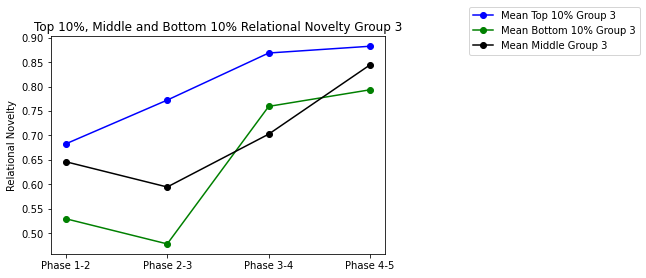

In [21]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group3,'bo-',label='Mean Top 10% Group 3') 
line2 = plt.plot(x_axis, bottom_group3,'go-',label='Mean Bottom 10% Group 3') 
line3 = plt.plot(x_axis, middle_group3,'ko-',label='Mean Middle Group 3')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 3")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

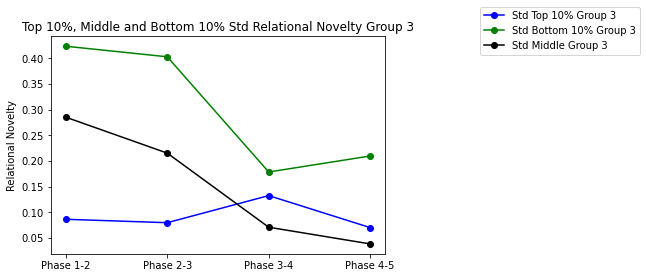

In [22]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, std_top_group3,'bo-',label='Std Top 10% Group 3') 
line2 = plt.plot(x_axis, std_bottom_group3,'go-',label='Std Bottom 10% Group 3') 
line3 = plt.plot(x_axis, std_middle_group3,'ko-',label='Std Middle Group 3')

plt.title("Top 10%, Middle and Bottom 10% Std Relational Novelty Group 3")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10% Group 2

In [23]:
df_list = [df_g2_p1, df_g2_p2, df_g2_p3, df_g2_p4]

top_group2 = []
std_top_group2 = []
for df in df_list:
    top_group2.append(df['novelty'].head(5).describe().loc['mean'])
    std_top_group2.append(df['novelty'].head(5).describe().loc['std'])

## Bottom 10% Group 2

In [24]:
df_list = [df_g2_p1, df_g2_p2, df_g2_p3, df_g2_p4]

bottom_group2 = []
std_bottom_group2 = []
for df in df_list:
    bottom_group2.append(df['novelty'].tail(5).describe().loc['mean'])
    std_bottom_group2.append(df['novelty'].tail(5).describe().loc['std'])

## Middle in Group 2

In [25]:
df_list = [df_g2_p1, df_g2_p2, df_g2_p3, df_g2_p4]

middle_group2 = []
std_middle_group2 = []
for df in df_list:
    middle_group2.append(df[['novelty']].iloc[[24,28]].describe().loc['mean'])
    std_middle_group2.append(df[['novelty']].iloc[[24,28]].describe().loc['std'])

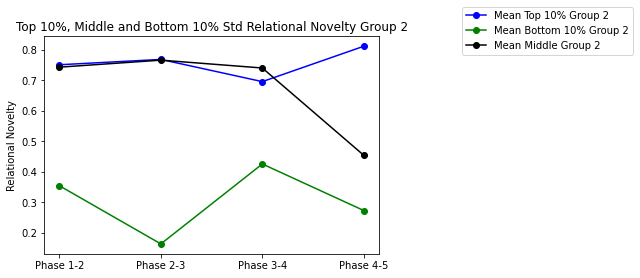

In [26]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group2,'bo-',label='Mean Top 10% Group 2') 
line2 = plt.plot(x_axis, bottom_group2,'go-',label='Mean Bottom 10% Group 2') 
line3 = plt.plot(x_axis, middle_group2,'ko-',label='Mean Middle Group 2')

plt.title("Top 10%, Middle and Bottom 10% Std Relational Novelty Group 2")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

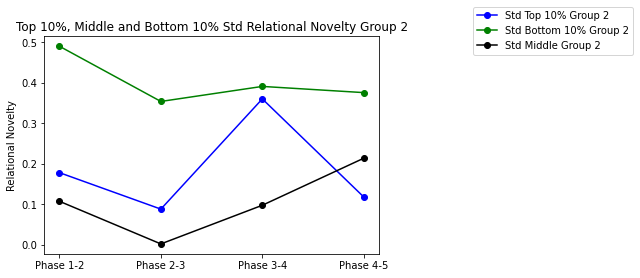

In [27]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, std_top_group2,'bo-',label='Std Top 10% Group 2') 
line2 = plt.plot(x_axis, std_bottom_group2,'go-',label='Std Bottom 10% Group 2') 
line3 = plt.plot(x_axis, std_middle_group2,'ko-',label='Std Middle Group 2')

plt.title("Top 10%, Middle and Bottom 10% Std Relational Novelty Group 2")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10% Group 1

In [28]:
df_list = [df_g1_p1, df_g1_p2, df_g1_p3, df_g1_p4]

top_group1 = []
std_top_group1 = []
for df in df_list:
    top_group1.append(df['novelty'].head(5).describe().loc['mean'])
    std_top_group1.append(df['novelty'].head(5).describe().loc['std'])

## Bottom 10% Group 1

In [29]:
df_list = [df_g1_p1, df_g1_p2, df_g1_p3, df_g1_p4]

bottom_group1 = []
std_bottom_group1 = []
for df in df_list:
    bottom_group1.append(df['novelty'].tail(5).describe().loc['mean'])
    std_bottom_group1.append(df['novelty'].tail(5).describe().loc['std'])

## Middle Group 1

In [30]:
df_list = [df_g1_p1, df_g1_p2, df_g1_p3, df_g1_p4]

middle_group1 = []
std_middle_group1 = []
for df in df_list:
    middle_group1.append(df[['novelty']].iloc[[23,27]].describe().loc['mean'])
    std_middle_group1.append(df['novelty'].iloc[[23,27]].describe().loc['std'])

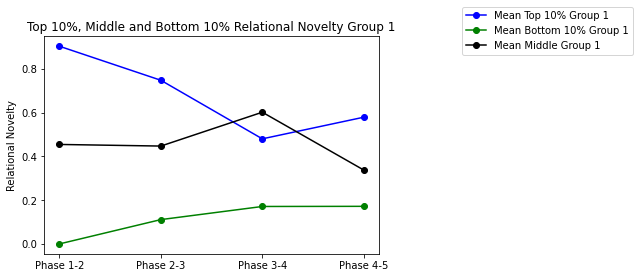

In [31]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group1,'bo-',label='Mean Top 10% Group 1') 
line2 = plt.plot(x_axis, bottom_group1,'go-',label='Mean Bottom 10% Group 1') 
line3 = plt.plot(x_axis, middle_group1,'ko-',label='Mean Middle Group 1')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 1")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

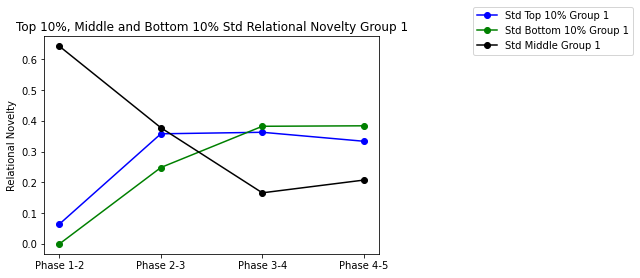

In [32]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, std_top_group1,'bo-',label='Std Top 10% Group 1') 
line2 = plt.plot(x_axis, std_bottom_group1,'go-',label='Std Bottom 10% Group 1') 
line3 = plt.plot(x_axis, std_middle_group1,'ko-',label='Std Middle Group 1')

plt.title("Top 10%, Middle and Bottom 10% Std Relational Novelty Group 1")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10% in Group 0

In [33]:
df_list = [df_g0_p1, df_g0_p2, df_g0_p3, df_g0_p4]

top_group0 = []
std_top_group0 = []
for df in df_list:
    top_group0.append(df['novelty'].head(4).describe().loc['mean'])
    std_top_group0.append(df['novelty'].head(4).describe().loc['std'])

## Bottom 10% in Group 0

In [34]:
df_list = [df_g0_p1, df_g0_p2, df_g0_p3, df_g0_p4]

bottom_group0 = []
std_bottom_group0 = []
for df in df_list:
    bottom_group0.append(df['novelty'].tail(4).describe().loc['mean'])
    std_bottom_group0.append(df['novelty'].tail(4).describe().loc['std'])

## Middle Group 0

In [35]:
df_list = [df_g0_p1, df_g0_p2, df_g0_p3, df_g0_p4]

middle_group0 = []
std_middle_group0 = []
for df in df_list:
    middle_group0.append(df[['novelty']].iloc[[22,26]].describe().loc['mean'])
    std_middle_group0.append(df[['novelty']].iloc[[22,26]].describe().loc['std'])

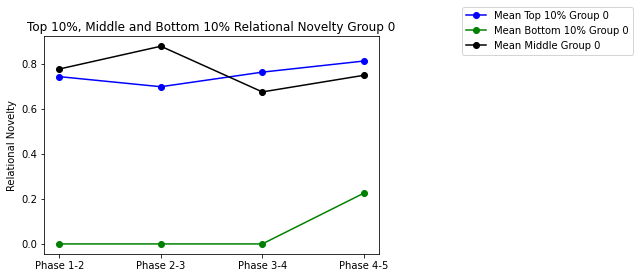

In [36]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, top_group0,'bo-',label='Mean Top 10% Group 0') 
line2 = plt.plot(x_axis, bottom_group0,'go-',label='Mean Bottom 10% Group 0') 
line3 = plt.plot(x_axis, middle_group0,'ko-',label='Mean Middle Group 0')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 0")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

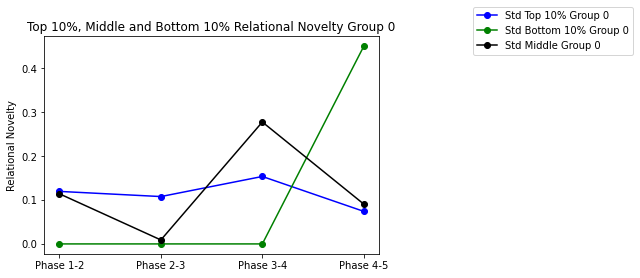

In [37]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, std_top_group0,'bo-',label='Std Top 10% Group 0') 
line2 = plt.plot(x_axis, std_bottom_group0,'go-',label='Std Bottom 10% Group 0') 
line3 = plt.plot(x_axis, std_middle_group0,'ko-',label='Std Middle Group 0')

plt.title("Top 10%, Middle and Bottom 10% Relational Novelty Group 0")
plt.ylabel("Relational Novelty")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10%, Middle and Bottom 10% pairwise similarity Group 3

## Stage 1

In [38]:
# four largest values in column age
df_g3_p1_top = df_g3_p1.nlargest(4, ['total'])
df_g3_p1_top = df_g3_p1_top.Student.tolist()
df_g3_p1_top

['dduartec', 'jumcorredorro', 'lgmoralesa', 'jscastelblancoh']

In [121]:
stage1_bogota3_top = stage1_bogota3[stage1_bogota3['user2'].isin(df_g3_p1_top)]
stage1_bogota3_top = stage1_bogota3_top['similarity'].describe().loc['mean']

In [40]:
df_g3_p1_bottom = df_g3_p1.nsmallest(4, ['total'])
df_g3_p1_bottom = df_g3_p1_bottom.Student.tolist()
df_g3_p1_bottom 

['lizzyt10h', 'wilson911013', 'mballeng91', 'NicolasPrr']

In [114]:
stage1_bogota3_bottom = stage1_bogota3[stage1_bogota3['user2'].isin(df_g3_p1_bottom)]
stage1_bogota3_bottom = stage1_bogota3_bottom['similarity'].describe().loc['mean']

## Stage 2

In [130]:
df_g3_p2_top = df_g3_p2.nlargest(4, ['total'])
df_g3_p2_top = df_g3_p2_top.Student.tolist()
df_g3_p2_top

['jumcorredorro', 'lgmoralesa', 'dduartec', 'jmalvarezd']

In [132]:
stage2_bogota3_top = stage2_bogota3[stage2_bogota3['user2'].isin(df_g3_p2_top)]
stage2_bogota3_top = stage2_bogota3_top['similarity'].describe().loc['mean']
stage2_bogota3_top

0.05283700161675786

In [44]:
df_g3_p2_bottom = df_g3_p2.nsmallest(4, ['total'])
df_g3_p2_bottom = df_g3_p2_bottom.Student.tolist()
df_g3_p2_bottom 

['wilson911013', 'Chranium', 'mballeng91', 'afceballosr']

In [112]:
stage2_bogota3_bottom = stage2_bogota3[stage2_bogota3['user2'].isin(df_g3_p2_bottom)]
stage2_bogota3_bottom = stage2_bogota3_bottom['similarity'].describe().loc['mean']

## Stage 3

In [46]:
df_g3_p3_top = df_g3_p3.nlargest(4, ['total'])
df_g3_p3_top = df_g3_p3_top.Student.tolist()
df_g3_p3_top

['juligarji', 'lgmoralesa', 'jscastelblancoh', 'jumcorredorro']

In [110]:
stage3_bogota3_top = stage3_bogota3[stage3_bogota3['user2'].isin(df_g3_p3_top)]
stage3_bogota3_op = stage3_bogota3_top['similarity'].describe().loc['mean']

In [48]:
df_g3_p3_bottom = df_g3_p3.nsmallest(4, ['total'])
df_g3_p3_bottom = df_g3_p3_bottom.Student.tolist()
df_g3_p3_bottom 

['davidh17', 'wilson911013', 'dduartec', 'Chranium']

In [111]:
stage3_bogota3_bottom = stage3_bogota3[stage3_bogota3['user2'].isin(df_g3_p3_bottom)]
stage3_bogota3_bottom = stage3_bogota3_bottom['similarity'].describe().loc['mean']

## Stage 4

In [50]:
df_g3_p4_top = df_g3_p4.nlargest(4, ['total'])
df_g3_p4_top = df_g3_p4_top.Student.tolist()
df_g3_p4_top

['NicolasPrr', 'jscastelblancoh', 'juligarji', 'lacardenasv']

In [125]:
stage4_bogota3_top = stage4_bogota3[stage4_bogota3['user2'].isin(df_g3_p4_top)]
stage4_bogota3_top = stage4_bogota3_top['similarity'].describe().loc['mean']

In [52]:
df_g3_p4_bottom = df_g3_p4.nsmallest(4, ['total'])
df_g3_p4_bottom = df_g3_p4_bottom.Student.tolist()
df_g3_p4_bottom 

['wilson911013', 'Chranium', 'mballeng91', 'spenas']

In [109]:
stage4_bogota3_bottom = stage4_bogota3[stage3_bogota3['user2'].isin(df_g3_p4_bottom)]
stage4_bogota3_bottom = stage4_bogota3_bottom['similarity'].describe().loc['mean']

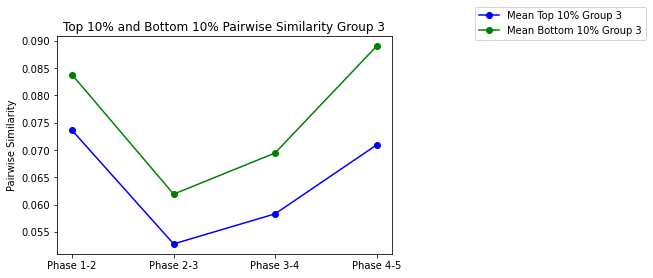

In [147]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

top = [stage1_bogota3_top, stage2_bogota3_top, stage3_bogota3_top, stage4_bogota3_top]
bottom = [stage1_bogota3_bottom, stage2_bogota3_bottom, stage3_bogota3_bottom, stage4_bogota3_bottom]


line1 = plt.plot(x_axis, top,'bo-',label='Mean Top 10% Group 3') 
line2 = plt.plot(x_axis, bottom ,'go-',label='Mean Bottom 10% Group 3') 

plt.title("Top 10% and Bottom 10% Pairwise Similarity Group 3")
plt.ylabel("Pairwise Similarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10%, Middle and Bottom 10% pairwise similarity Group 2

## Stage 1

In [54]:
# four largest values in column age
df_g2_p1_top = df_g2_p1.nlargest(5, ['total'])
df_g2_p1_top = df_g2_p1_top.Student.tolist()
df_g2_p1_top

['fabianr23', 'juasmartinezbel', 'JuanitoAli', 'joaortizro', 'cesarochoa2006']

In [134]:
stage1_bogota2_top = stage1_bogota2[stage1_bogota2['user2'].isin(df_g2_p1_top)]
stage1_bogota2_top = stage1_bogota2_top['similarity'].describe().loc['mean']

In [56]:
df_g2_p1_bottom = df_g2_p1.nsmallest(5, ['total'])
df_g2_p1_bottom = df_g2_p1_bottom.Student.tolist()
df_g2_p1_bottom 

['jscontrerasp', 'jhcardenasa', 'ccvacad', 'CSebasGomez', 'tres-iqus']

In [135]:
stage1_bogota2_bottom = stage1_bogota2[stage1_bogota2['user2'].isin(df_g2_p1_bottom)]
stage1_bogota2_bottom = stage1_bogota2_bottom['similarity'].describe().loc['mean']

## Stage 2

In [58]:
df_g2_p2_top = df_g2_p2.nlargest(5, ['total'])
df_g2_p2_top = df_g2_p2_top.Student.tolist()
df_g2_p2_top

['fabianr23', 'Davsatu313', 'jhriverasa', 'joaortizro', 'juasmartinezbel']

In [136]:
stage2_bogota2_top = stage2_bogota2[stage2_bogota2['user2'].isin(df_g2_p2_top)]
stage2_bogota2_top = stage2_bogota2_top['similarity'].describe().loc['mean']

In [60]:
df_g2_p2_bottom = df_g2_p2.nsmallest(5, ['total'])
df_g2_p2_bottom = df_g2_p2_bottom.Student.tolist()
df_g2_p2_bottom 

['CSebasGomez', 'jscontrerasp', 'ccvacad', 'jhcardenasa', 'tres-iqus']

In [137]:
stage2_bogota2_bottom = stage2_bogota2[stage2_bogota2['user2'].isin(df_g2_p2_bottom)]
stage2_bogota2_bottom = stage2_bogota2_bottom['similarity'].describe().loc['mean']

## Stage 3

In [62]:
df_g2_p3_top = df_g2_p3.nlargest(5, ['total'])
df_g2_p3_top = df_g2_p3_top.Student.tolist()
df_g2_p3_top

['fabianr23', 'jhriverasa', 'JuanitoAli', 'juasmartinezbel', 'Davsatu313']

In [138]:
stage3_bogota2_top = stage3_bogota2[stage3_bogota2['user2'].isin(df_g2_p3_top)]
stage3_bogota2_top = stage3_bogota2_top['similarity'].describe().loc['mean']

In [64]:
df_g2_p3_bottom = df_g2_p3.nsmallest(5, ['total'])
df_g2_p3_bottom = df_g2_p3_bottom.Student.tolist()
df_g2_p3_bottom 

['lsfinite', 'ccvacad', 'CSebasGomez', 'jhcardenasa', 'jscontrerasp']

In [139]:
stage3_bogota2_bottom = stage3_bogota2[stage3_bogota2['user2'].isin(df_g2_p3_bottom)]
stage3_bogota2_bottom = stage3_bogota2_bottom['similarity'].describe().loc['mean']

## Stage 4

In [66]:
df_g2_p4_top = df_g2_p4.nlargest(5, ['total'])
df_g2_p4_top = df_g2_p4_top.Student.tolist()
df_g2_p4_top

['xdanielsb', 'Gantiva', 'leguzman', 'juasmartinezbel', 'cesarochoa2006']

In [140]:
stage4_bogota2_top = stage4_bogota2[stage4_bogota2['user2'].isin(df_g2_p4_top)]
stage4_bogota2_top = stage4_bogota2_top['similarity'].describe().loc['mean']

In [68]:
df_g2_p4_bottom = df_g2_p4.nsmallest(5, ['total'])
df_g2_p4_bottom = df_g2_p4_bottom.Student.tolist()
df_g2_p4_bottom 

['CSebasGomez', 'jhcardenasa', 'jscontrerasp', 'tres-iqus', 'crarojasca']

In [141]:
stage4_bogota2_bottom = stage4_bogota2[stage4_bogota2['user2'].isin(df_g2_p4_bottom)]
stage4_bogota2_bottom = stage4_bogota2_bottom['similarity'].describe().loc['mean']

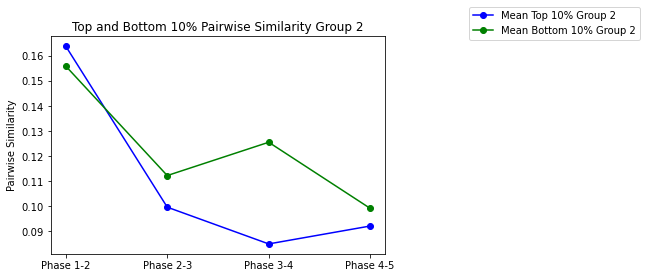

In [148]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

top = [stage1_bogota2_top, stage2_bogota2_top, stage3_bogota2_top, stage4_bogota2_top]
bottom = [stage1_bogota2_bottom, stage2_bogota2_bottom, stage3_bogota2_bottom, stage4_bogota2_bottom]


line1 = plt.plot(x_axis, top,'bo-',label='Mean Top 10% Group 2') 
line2 = plt.plot(x_axis, bottom ,'go-',label='Mean Bottom 10% Group 2') 

plt.title("Top and Bottom 10% Pairwise Similarity Group 2")
plt.ylabel("Pairwise Similarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10%, Middle and Bottom 10% pairwise similarity Group 1

## Stage 1

In [70]:
df_g1_p1_top = df_g1_p1.nlargest(5, ['total'])
df_g1_p1_top = df_g1_p1_top.Student.tolist()
df_g1_p1_top

['dsbarrerag', 'falperezgo', 'daandradec', 'jesusfchavarro', 'oeroaq']

In [170]:
stage1_bogota1_top = stage1_bogota1[stage1_bogota1['user2'].isin(df_g1_p1_top)]
stage1_bogota1_top = stage1_bogota1_top['similarity'].describe().loc['mean']

In [171]:
df_g1_p1_bottom = df_g1_p1.nsmallest(5, ['total'])
df_g1_p1_bottom = df_g1_p1_bottom.Student.tolist()
df_g1_p1_bottom 

['kastellanos', 'ItsNavi', 'Zeugmax', 'andfsanchezlem', 'gfalbarracinr']

In [172]:
stage1_bogota1_bottom = stage1_bogota1[stage1_bogota1['user2'].isin(df_g1_p1_bottom)]
stage1_bogota1_bottom = stage1_bogota1_bottom['similarity'].describe().loc['mean']

## Stage 2

In [74]:
df_g1_p2_top = df_g1_p2.nlargest(5, ['total'])
df_g1_p2_top = df_g1_p2_top.Student.tolist()
df_g1_p2_top

['jesusfchavarro', 'falperezgo', 'jonatan360', 'dsbarrerag', 'diegoaguevarar']

In [173]:
stage2_bogota1_top = stage2_bogota1[stage2_bogota1['user2'].isin(df_g1_p2_top)]
stage2_bogota1_top = stage2_bogota1_top['similarity'].describe().loc['mean']

In [174]:
df_g1_p2_bottom = df_g1_p2.nsmallest(5, ['total'])
df_g1_p2_bottom = df_g1_p2_bottom.Student.tolist()
df_g1_p2_bottom 

['Zeugmax', 'ItsNavi', 'kastellanos', 'andfsanchezlem', 'gsuarezc04']

In [175]:
stage2_bogota1_bottom = stage2_bogota1[stage2_bogota1['user2'].isin(df_g1_p2_bottom)]
stage2_bogota1_bottom = stage2_bogota1_bottom['similarity'].describe().loc['mean']

## Stage 3

In [78]:
df_g1_p3_top = df_g1_p3.nlargest(5, ['total'])
df_g1_p3_top = df_g1_p3_top.Student.tolist()
df_g1_p3_top

['oeroaq', 'jonatan360', 'jesusfchavarro', 'daandradec', 'diegoaguevarar']

In [176]:
stage3_bogota1_top = stage3_bogota1[stage3_bogota1['user2'].isin(df_g1_p3_top)]
stage3_bogota1_top = stage3_bogota1_top['similarity'].describe().loc['mean']

In [80]:
df_g1_p3_bottom = df_g1_p3.nsmallest(5, ['total'])
df_g1_p3_bottom = df_g1_p3_bottom.Student.tolist()
df_g1_p3_bottom 

['Zeugmax', 'ItsNavi', 'kastellanos', 'andfsanchezlem', 'gfalbarracinr']

In [177]:
stage3_bogota1_bottom = stage3_bogota1[stage3_bogota1['user2'].isin(df_g1_p3_bottom)]
stage3_bogota1_bottom = stage3_bogota1_bottom['similarity'].describe().loc['mean']

## Stage 4

In [82]:
df_g1_p4_top = df_g1_p4.nlargest(5, ['total'])
df_g1_p4_top = df_g1_p4_top.Student.tolist()
df_g1_p4_top

['oeroaq', 'jonatan360', 'jesusfchavarro', 'daandradec', 'djguzmanc']

In [178]:
stage4_bogota1_top = stage4_bogota1[stage4_bogota1['user2'].isin(df_g1_p4_top)]
stage4_bogota1_top = stage4_bogota1_top['similarity'].describe().loc['mean']

In [84]:
df_g1_p4_bottom = df_g1_p4.nsmallest(5, ['total'])
df_g1_p4_bottom = df_g1_p4_bottom.Student.tolist()
df_g1_p4_bottom 

['Zeugmax', 'ItsNavi', 'kastellanos', 'andfsanchezlem', 'gsuarezc04']

In [179]:
stage4_bogota1_bottom = stage4_bogota1[stage4_bogota1['user2'].isin(df_g1_p4_bottom)]
stage4_bogota1_bottom = stage4_bogota1_bottom['similarity'].describe().loc['mean']

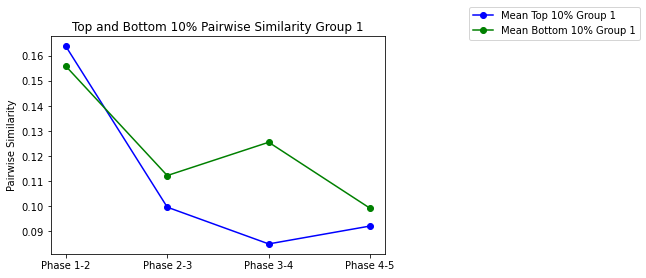

In [195]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

top = [stage1_bogota2_top, stage2_bogota2_top, stage3_bogota2_top, stage4_bogota2_top]
bottom = [stage1_bogota2_bottom, stage2_bogota2_bottom, stage3_bogota2_bottom, stage4_bogota2_bottom]


line1 = plt.plot(x_axis, top,'bo-',label='Mean Top 10% Group 1') 
line2 = plt.plot(x_axis, bottom ,'go-',label='Mean Bottom 10% Group 1') 

plt.title("Top and Bottom 10% Pairwise Similarity Group 1")
plt.ylabel("Pairwise Similarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Top 10%, Middle and Bottom 10% pairwise similarity Group 0

## Stage 1

In [86]:
df_g0_p1_top = df_g0_p1.nlargest(4, ['total'])
df_g0_p1_top = df_g0_p1_top.Student.tolist()
df_g0_p1_top

['capinillab', 'bsgarciac', 'mnguzmanc', 'sacastroc']

In [158]:
stage1_bogota0_top = stage1_bogota0[stage1_bogota0['user2'].isin(df_g0_p1_top)]
stage1_bogota0_top = stage1_bogota0_top['similarity'].describe().loc['mean']

In [88]:
df_g0_p1_bottom = df_g0_p1.nsmallest(4, ['total'])
df_g0_p1_bottom = df_g0_p1_bottom.Student.tolist()
df_g0_p1_bottom 

['jcneivaa', 'annipi', 'jdsolanos', 'fmbernalb']

In [159]:
stage1_bogota0_bottom = stage1_bogota0[stage1_bogota0['user2'].isin(df_g0_p1_bottom)]
stage1_bogota0_bottom = stage1_bogota0_bottom['similarity'].describe().loc['mean']

## Stage 2

In [90]:
df_g0_p2_top = df_g0_p2.nlargest(4, ['total'])
df_g0_p2_top = df_g0_p2_top.Student.tolist()
df_g0_p2_top

['jdsuarezj', 'JoseMolano', 'bsgarciac', 'lfvalderrama']

In [160]:
stage2_bogota0_top = stage2_bogota0[stage2_bogota0['user2'].isin(df_g0_p2_top)]
stage2_bogota0_top = stage2_bogota0_top['similarity'].describe().loc['mean']

In [92]:
df_g0_p2_bottom = df_g0_p2.nsmallest(4, ['total'])
df_g0_p2_bottom = df_g0_p2_bottom.Student.tolist()
df_g0_p2_bottom 

['odprietoh', 'jdsolanos', 'fmbernalb', 'MogGy94']

In [161]:
stage2_bogota0_bottom = stage2_bogota0[stage2_bogota0['user2'].isin(df_g0_p2_bottom)]
stage2_bogota0_bottom = stage2_bogota0_bottom['similarity'].describe().loc['mean']

## Stage 3

In [94]:
df_g0_p3_top = df_g0_p3.nlargest(4, ['total'])
df_g0_p3_top = df_g0_p3_top.Student.tolist()
df_g0_p3_top

['bsgarciac', 'jdsuarezj', 'capinillab', 'mnguzmanc']

In [162]:
stage3_bogota0_top = stage3_bogota0[stage3_bogota0['user2'].isin(df_g0_p3_top)]
stage3_bogota0_top = stage3_bogota0_top['similarity'].describe().loc['mean']

In [96]:
df_g0_p3_bottom = df_g0_p3.nsmallest(4, ['total'])
df_g0_p3_bottom = df_g0_p3_bottom.Student.tolist()
df_g0_p3_bottom 

['odprietoh', 'jdsolanos', 'yocuervoc', 'MogGy94']

In [193]:
stage3_bogota0_bottom = stage3_bogota0[stage3_bogota0['user2'].isin(df_g0_p3_bottom)]
stage3_bogota0_bottom = stage3_bogota0_bottom['similarity'].describe().loc['mean']

## Stage 4

In [98]:
df_g0_p4_top = df_g0_p4.nlargest(4, ['total'])
df_g0_p4_top = df_g0_p4_top.Student.tolist()
df_g0_p4_top

['lfvalderrama', 'Judgarciani', 'bsgarciac', 'Moimolcp']

In [164]:
stage4_bogota0_top = stage4_bogota0[stage4_bogota0['user2'].isin(df_g0_p4_top)]
stage4_bogota0_top = stage4_bogota0_top['similarity'].describe().loc['mean']

In [100]:
df_g0_p4_bottom = df_g0_p4.nsmallest(4, ['total'])
df_g0_p4_bottom = df_g0_p4_bottom.Student.tolist()
df_g0_p4_bottom 

['annipi', 'jcneivaa', 'jdsolanos', 'odprietoh']

In [165]:
stage4_bogota0_bottom = stage4_bogota0[stage4_bogota0['user2'].isin(df_g0_p4_bottom)]
stage4_bogota0_bottom = stage4_bogota0_bottom['similarity'].describe().loc['mean']

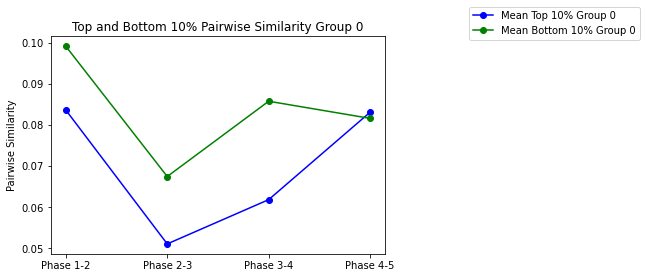

In [194]:
import matplotlib.pyplot as plt

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

top = [stage1_bogota0_top, stage2_bogota0_top, stage3_bogota0_top, stage4_bogota0_top]
bottom = [stage1_bogota0_bottom, stage2_bogota0_bottom, stage3_bogota0_bottom, stage4_bogota0_bottom]


line1 = plt.plot(x_axis, top,'bo-',label='Mean Top 10% Group 0') 
line2 = plt.plot(x_axis, bottom ,'go-',label='Mean Bottom 10% Group 0') 

plt.title("Top and Bottom 10% Pairwise Similarity Group 0")
plt.ylabel("Pairwise Similarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [102]:
%store df_g3_p1_top
%store df_g3_p1_bottom
%store df_g3_p2_top
%store df_g3_p2_bottom
%store df_g3_p3_top
%store df_g3_p3_bottom
%store df_g3_p4_top
%store df_g3_p4_bottom

%store df_g2_p1_top
%store df_g2_p1_bottom
%store df_g2_p2_top
%store df_g2_p2_bottom
%store df_g2_p3_top
%store df_g2_p3_bottom
%store df_g2_p4_top
%store df_g2_p4_bottom

%store df_g1_p1_top
%store df_g1_p1_bottom
%store df_g1_p2_top
%store df_g1_p2_bottom
%store df_g1_p3_top
%store df_g1_p3_bottom
%store df_g1_p4_top
%store df_g1_p4_bottom

%store df_g0_p1_top
%store df_g0_p1_bottom
%store df_g0_p2_top
%store df_g0_p2_bottom
%store df_g0_p3_top
%store df_g0_p3_bottom
%store df_g0_p4_top
%store df_g0_p4_bottom

Stored 'df_g3_p1_top' (list)
Stored 'df_g3_p1_bottom' (list)
Stored 'df_g3_p2_top' (list)
Stored 'df_g3_p2_bottom' (list)
Stored 'df_g3_p3_top' (list)
Stored 'df_g3_p3_bottom' (list)
Stored 'df_g3_p4_top' (list)
Stored 'df_g3_p4_bottom' (list)
Stored 'df_g2_p1_top' (list)
Stored 'df_g2_p1_bottom' (list)
Stored 'df_g2_p2_top' (list)
Stored 'df_g2_p2_bottom' (list)
Stored 'df_g2_p3_top' (list)
Stored 'df_g2_p3_bottom' (list)
Stored 'df_g2_p4_top' (list)
Stored 'df_g2_p4_bottom' (list)
Stored 'df_g1_p1_top' (list)
Stored 'df_g1_p1_bottom' (list)
Stored 'df_g1_p2_top' (list)
Stored 'df_g1_p2_bottom' (list)
Stored 'df_g1_p3_top' (list)
Stored 'df_g1_p3_bottom' (list)
Stored 'df_g1_p4_top' (list)
Stored 'df_g1_p4_bottom' (list)
Stored 'df_g0_p1_top' (list)
Stored 'df_g0_p1_bottom' (list)
Stored 'df_g0_p2_top' (list)
Stored 'df_g0_p2_bottom' (list)
Stored 'df_g0_p3_top' (list)
Stored 'df_g0_p3_bottom' (list)
Stored 'df_g0_p4_top' (list)
Stored 'df_g0_p4_bottom' (list)
